<a href="https://colab.research.google.com/github/irbaadika/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount to drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [6]:
def median_filter(data, kernel_size):
  temp = []
  indexer = kernel_size // 2
  data_final = []
  data_final = np.zeros((len(data),len(data[0])))
  for i in range(len(data)):
    for j in range(len(data[0])):
      for z in range(kernel_size):
        if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
          for c in range(kernel_size):
            temp.append(0)
        else:
          if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
            temp.append(0)
          else:
            for k in range(kernel_size):
              temp.append(data[i + z - indexer][j + k - indexer])

      temp.sort()
      data_final[i][j] = temp[len(temp) // 2]
      temp = []
  return data_final

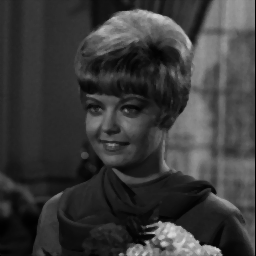

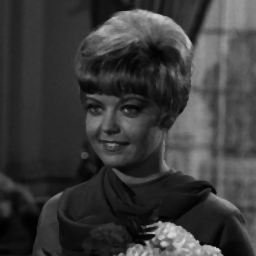

In [10]:
img = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

filtered_img1 = median_filter(img_gray, 3)
cv2_imshow(filtered_img1)
cvcoba = cv.medianBlur(img_gray, 3)
cv2_imshow(cvcoba)